In [1]:
!pip install imbalanced-learn
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 8.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_multilabel_classification
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import SparsePCA, PCA
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import sklearn
from collections import Counter
from sklearn.datasets import make_classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
import time
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import IPython
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from sklearn import model_selection
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [4]:
df_from_db = pd.read_csv('/content/df_from_db.csv')
df_from_db = df_from_db.drop('Unnamed: 0', axis = 1)
df_from_db = df_from_db.drop_duplicates(keep='first')
df_from_db = df_from_db.reset_index().drop('index', axis = 1)
df_from_db

,constituent,emergent_behavior
0,Storage Agent,load-generation balance
1,Battery storages,load-generation balance
2,Electric Load,load-generation balance
3,Building Management System (BMS),load-generation balance
4,Heating/Ventilation and Air-Conditioning syste...,load-generation balance
...,...,...
526,Battery storages,Balance between battery consumption and energy...
527,Photovoltaic System,Balance between battery consumption and energy...
528,electric vehicles,Balance between battery consumption and energy...
529,Wind Energy system,Balance between battery consumption and energy...


In [5]:
sum_groups = 0

for k, v in df_from_db.groupby((df_from_db['emergent_behavior'].shift() != df_from_db['emergent_behavior']).cumsum()):
  sum_groups += 1

print(sum_groups)

109


In [6]:
constituents_dataset = pd.DataFrame(df_from_db.constituent.dropna().unique(), columns=['constituent'])
constituents_dataset = constituents_dataset.set_index(list(constituents_dataset)[0]).T
constituents_dataset = pd.concat([constituents_dataset, pd.DataFrame(0, index=range(sum_groups), columns=constituents_dataset.columns)], ignore_index=True)
constituents_dataset.index.names = ['SoS']

emergent_behaviors_dataset = pd.DataFrame(df_from_db.emergent_behavior.dropna().unique(), columns=['emergent_behavior'])
emergent_behaviors_dataset = emergent_behaviors_dataset.set_index(list(emergent_behaviors_dataset)[0]).T
emergent_behaviors_dataset = pd.concat([emergent_behaviors_dataset, pd.DataFrame(0, index=range(sum_groups), columns=emergent_behaviors_dataset.columns)], ignore_index=True)
emergent_behaviors_dataset.index.names = ['SoS']

In [7]:
for k, v in df_from_db.groupby((df_from_db['emergent_behavior'].shift() != df_from_db['emergent_behavior']).cumsum()):
  print(f'[Line {k-1}]:')
  print('Constituents: ', v['constituent'].values)
  print('Emergent Behavior: ', v['emergent_behavior'].unique())
  print()

  for constituent in v['constituent'].values:
    constituents_dataset.loc[k-1, constituent] = 1
    # constituents_dataset[constituent][k-1] = 1

  # constituents_dataset[v['emergent_behavior'].unique()][k-1] = 1
  emergent_behaviors_dataset.loc[k-1, v['emergent_behavior'].unique()] = 1

[Line 0]:
Constituents:  ['Storage Agent' 'Battery storages' 'Electric Load'
 'Building Management System (BMS)'
 'Heating/Ventilation and Air-Conditioning system (HVAC)'
 'smart home applications utilizing IoT technologies'
 'Electric Appliances (lights/refrigerators/freezers/washers/dyers/water heaters/baseload)'
 'one heating system' 'distributed traffic lights network']
Emergent Behavior:  ['load-generation balance']

[Line 1]:
Constituents:  ['Storage Agent' 'Battery storages' 'Electric Load'
 'Building Management System (BMS)'
 'Heating/Ventilation and Air-Conditioning system (HVAC)'
 'smart home applications utilizing IoT technologies'
 'Electric Appliances (lights/refrigerators/freezers/washers/dyers/water heaters/baseload)'
 'one heating system' 'distributed traffic lights network']
Emergent Behavior:  ['supply power to homes even in the event of an electric grid outage']

[Line 2]:
Constituents:  ['Storage Agent' 'Battery storages' 'Electric Load'
 'Building Management System

In [8]:
constituents_dataset

constituent,Storage Agent,Battery storages,Electric Load,Building Management System (BMS),Heating/Ventilation and Air-Conditioning system (HVAC),smart home applications utilizing IoT technologies,Electric Appliances (lights/refrigerators/freezers/washers/dyers/water heaters/baseload),one heating system,distributed traffic lights network,Population survey data,Commercial Greenhouse Growers (CGGs),Virtual Power Plant (VPP) - Generator units/Controllable loads/Storage systems,Transportation system (prosumer),Oil & gas supply sytem (prosumer),Water supply system (prosumer),Smart Grid CS,(Prosumers) Households with Photovoltaic cells and wind turbines,provider of raw material,Central controller,Diesel Generator Agent,Sensors,Photovoltaic System,Wind Energy system,Transfer Switch,IT Servers,Thermal Storage Device (TES),Cooling System,Power Distribution Unit (PDU),Market Agent,Optimizer Agent,Group (Representative) Agent - collectives,Service providers,one home automation system,one vehicle parking system,electric vehicles,charging station for electric vehicles,Transformer,Transmission line,Lighting CS,Audiovisual Management CS,Online Scheduling CS,Fire Detection CS,Security Surveillance CS,Emergency Management CS
SoS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
emergent_behaviors_dataset

emergent_behavior,load-generation balance,supply power to homes even in the event of an electric grid outage,to ensure the comfort of its occupants by enhancing the automation to relief them from manual control of different services while increasing the energy savings,minimize the average vehicle waiting time in the network,"north-to-south, red-to-green transition times",avoid many simultaneous charging cycles,minimum peak loads emerging,cost limits are not exceeded,balance between energy production and consumption,optimise energy usage in a range of weather conditions,promote to use a VPP from a new electricity production cost policy,cluster together into local energy collectives,market mechanisms,peak optimization,distributed negotiations between groups,optimizations of the decisions of the Smart Grid given the best control design,"to use as much as possible of the locally produced renewable energy and transact energy to decrease operational costs, optimizing its integration in smart grid advanced context.",system disruption responses and minimization of the overall costs of satisfying total demand from the system in these events,agents perform different functions based on their unique advantages relative to other agents postdisruption,"coordination mechanism, dynamic reorganization and coordination of the network under a disruption",Negotiation and collaboration for resource allocation and demand efficiency,Resolution of potencial conflicts,supply power power to the electric load,Different responses according to different demand/response schemes (price-based),decision about the best control design of the Smart Grid,to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.,energy consumption/production patterns,demand side management,battery storage models,use storage and demand-response techniques,balance energy consumption and production,deploy batteries in different ways depending on the behaviour of their members,Optimize the overall charging behavior,grid stability,control the battery and enhance the operation of the system,decrease the power consumption from power utility by using available energy from the solar panels,minimize the local waiting time for vehicles,Balance between battery consumption and energy production
SoS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = constituents_dataset
y = emergent_behaviors_dataset

In [11]:
X.shape

(109, 44)

In [12]:
y.shape

(109, 38)

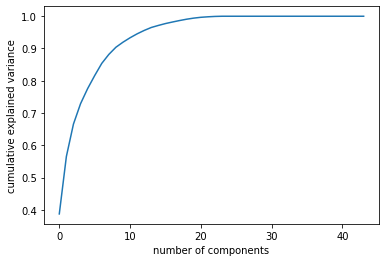

In [13]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [14]:
pca_10 = PCA(n_components=10)
pca_10.fit(X)
X_pca = pca_10.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (109, 44)
transformed shape: (109, 10)


In [15]:
print('Eigenvalues')
print(np.round(pca_10.explained_variance_,decimals=1))
print('Eigenvectors')
print(np.round(pca_10.components_,decimals=2))

Eigenvalues
[1.5 0.7 0.4 0.2 0.2 0.2 0.1 0.1 0.1 0.1]
Eigenvectors
[[ 0.29  0.3   0.31  0.31  0.32  0.32  0.32  0.32  0.31 -0.   -0.01 -0.01
  -0.01 -0.01 -0.01 -0.03 -0.06 -0.01 -0.13 -0.02 -0.14 -0.1  -0.1  -0.01
  -0.12 -0.01 -0.01 -0.01 -0.02 -0.02 -0.03 -0.02 -0.   -0.   -0.08 -0.02
  -0.13 -0.13 -0.   -0.   -0.   -0.   -0.   -0.  ]
 [ 0.09  0.08  0.04  0.06  0.07  0.07  0.07  0.07  0.   -0.01 -0.01 -0.02
  -0.02 -0.02 -0.02 -0.04 -0.11 -0.02  0.4  -0.    0.41 -0.26 -0.24 -0.
   0.38 -0.   -0.   -0.   -0.05 -0.05 -0.08 -0.05 -0.   -0.   -0.24 -0.01
   0.37  0.37 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]
 [ 0.04 -0.14 -0.02 -0.04 -0.01 -0.01 -0.01 -0.01 -0.11  0.01  0.02  0.01
   0.07  0.07  0.07  0.04  0.36  0.07 -0.06 -0.05 -0.07 -0.44 -0.44 -0.02
  -0.05 -0.02 -0.02 -0.02  0.26  0.26  0.35  0.26  0.01  0.01 -0.26 -0.06
  -0.1  -0.1   0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.22  0.38  0.14 -0.01 -0.06 -0.06 -0.06 -0.06 -0.01 -0.03 -0.04 -0.05
  -0.03 -0.03 -0.03 -0.07  0.42 -0.03 -0.1

In [16]:
sparse_pca = SparsePCA(n_components=10)
sparse_pca.fit(X)
X_pca_sparse = sparse_pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca_sparse.shape)

original shape:    (109, 44)
transformed shape: (109, 10)


In [17]:
pd.DataFrame(X_pca_sparse)

,0,1,2,3,4,5,6,7,8,9
0,1.879373,-0.451047,-0.109206,-0.333995,-0.160028,0.654010,0.708511,0.654010,-0.190753,-0.0837
1,1.879373,-0.451047,-0.109206,-0.333995,-0.160028,0.654010,0.708511,0.654010,-0.190753,-0.0837
2,1.879373,-0.451047,-0.109206,-0.333995,-0.160028,0.654010,0.708511,0.654010,-0.190753,-0.0837
3,1.879373,-0.451047,-0.109206,-0.333995,-0.160028,0.654010,0.708511,0.654010,-0.190753,-0.0837
4,1.879373,-0.451047,-0.109206,-0.333995,-0.160028,0.654010,0.708511,0.654010,-0.190753,-0.0837
...,...,...,...,...,...,...,...,...,...,...
104,-0.543762,-0.451047,-0.109206,1.066216,-0.160028,-0.336089,-0.281588,-0.336089,0.799346,-0.0837
105,-0.543762,-0.451047,-0.109206,1.066216,-0.160028,-0.336089,-0.281588,-0.336089,0.799346,-0.0837
106,-0.543762,-0.451047,-0.109206,1.066216,-0.160028,-0.336089,-0.281588,-0.336089,0.799346,-0.0837
107,-0.543762,-0.451047,-0.109206,1.066216,-0.160028,-0.336089,-0.281588,-0.336089,0.799346,-0.0837


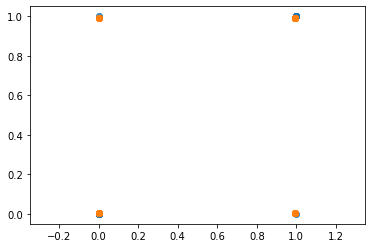

In [18]:
X_new = sparse_pca.inverse_transform(X_pca_sparse)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [19]:
sparse_pca_3 = SparsePCA(n_components=3)
sparse_pca_3.fit(X)
X_pca_sparse_3 = sparse_pca_3.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca_sparse_3.shape)

original shape:    (109, 44)
transformed shape: (109, 3)


In [20]:
pd.DataFrame(X_pca_sparse_3)

,0,1,2
0,2.210049,-0.451047,-0.374330
1,2.210049,-0.451047,-0.374330
2,2.210049,-0.451047,-0.374330
3,2.210049,-0.451047,-0.374330
4,2.210049,-0.451047,-0.374330
...,...,...,...
104,-0.758237,-0.451047,1.248893
105,-0.758237,-0.451047,1.248893
106,-0.758237,-0.451047,1.248893
107,-0.758237,-0.451047,1.248893


In [21]:
Xax = X_pca_sparse_3[:,0]
Yax = X_pca_sparse_3[:,1]
Zax = X_pca_sparse_3[:,2]

In [22]:
array_figures = []

for column in y.columns:
  trace = go.Scatter3d(
      x=Xax,
      y=Yax,
      z=Zax,

      mode='markers',
      marker=dict(
          size=5,
          color=y[column],              
          colorscale='Viridis',   
      ),
      name= column,

      # list comprehension to add text on hover
      text= [f"x: {x}<br>y: {y}<br>z: {z}" for x,y,z in list(zip(Xax, Yax, Zax))],
      # if you do not want to display x,y,z
      hoverinfo='text'
  )

  layout = go.Layout(title = 'Emergent behavior: ' + column)
  data = [trace]

  fig = go.Figure(data=data, layout=layout)
  array_figures.append(fig)
  # iplot(fig)

In [23]:
print(len(array_figures))

38


In [24]:
# CHOOSE ONE OF THE FIGURES TO RENDER (BETWEEN NUMBERS 0 AND THE ONE PRINTED ABOVE)
array_figures[29]

In [25]:
def rebalancer(X, y):
  over = RandomOverSampler(sampling_strategy='minority')
  under = RandomUnderSampler(sampling_strategy='majority')
  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)

  X, y = pipeline.fit_resample(X, y)

  return X, y

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pca_sparse, y, train_size=0.8, random_state=42, shuffle=True)

In [27]:
print(len(xtrain), len(xtest), len(ytrain), len(ytest))

87 22 87 22


MODEL =>  LinearRegression()

LinearRegression()  - (Fitting) SCORE FOR:  load-generation balance
0.5097553598307097

AUC: 0.891 (0.010)

ROC CURVE


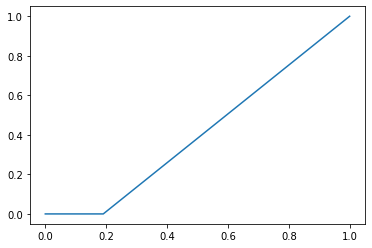


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


LinearRegression()  - (Fitting) SCORE FOR:  minimize the average vehicle waiting time in the network
0.4942470734586435

AUC: 0.805 (0.026)

ROC CURVE


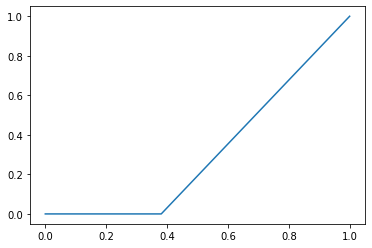


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.38      0.62      0.47        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.31        42
   macro avg       0.19      0.31      0.24        42
weighted avg       0.19      0.31      0.24        42


LinearRegression()  - (Fitting) SCORE FOR:  north-to-south, red-to-green transition times
0.7697755310395774

AUC: 0.953 (0.022)

ROC CURVE


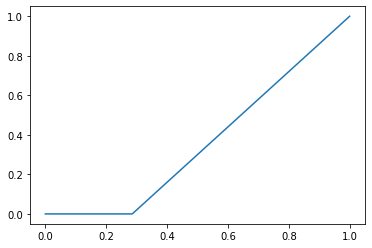


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


LinearRegression()  - (Fitting) SCORE FOR:  avoid many simultaneous charging cycles
0.51088356050461

AUC: 0.857 (0.044)

ROC CURVE


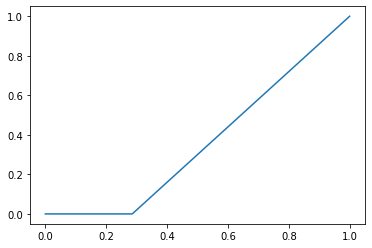


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


LinearRegression()  - (Fitting) SCORE FOR:  optimise energy usage in a range of weather conditions
0.3620874865527087

AUC: 0.798 (0.005)

ROC CURVE


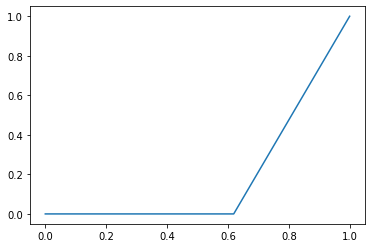


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.28      0.38      0.32        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.19        42
   macro avg       0.14      0.19      0.16        42
weighted avg       0.14      0.19      0.16        42


LinearRegression()  - (Fitting) SCORE FOR:  promote to use a VPP from a new electricity production cost policy
0.5205305175143724

AUC: 0.882 (0.049)

ROC CURVE


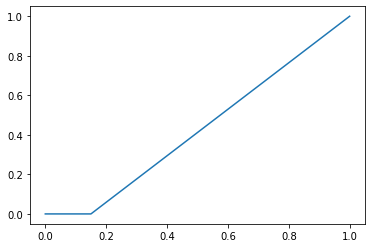


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.46      0.85      0.60        20
         1.0       0.00      0.00      0.00        20

    accuracy                           0.42        40
   macro avg       0.23      0.42      0.30        40
weighted avg       0.23      0.42      0.30        40


LinearRegression()  - (Fitting) SCORE FOR:  cluster together into local energy collectives
0.63722120341532

AUC: 0.927 (0.024)

ROC CURVE


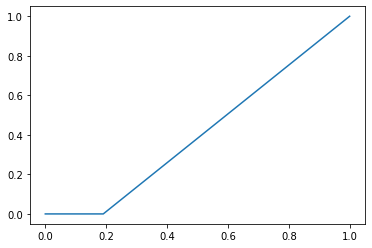


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


LinearRegression()  - (Fitting) SCORE FOR:  market mechanisms
0.9255711430703801

AUC: 0.988 (0.009)

ROC CURVE


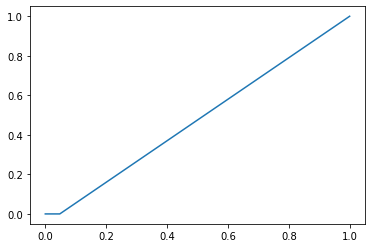


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LinearRegression()  - (Fitting) SCORE FOR:  peak optimization
0.6443159137115241

AUC: 0.921 (0.033)

ROC CURVE


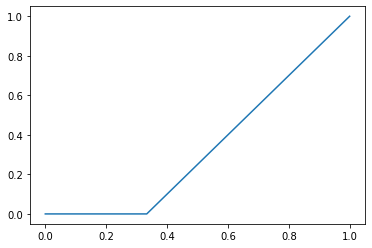


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LinearRegression()  - (Fitting) SCORE FOR:  agents perform different functions based on their unique advantages relative to other agents postdisruption
0.5523784358057018

AUC: 0.904 (0.021)

ROC CURVE


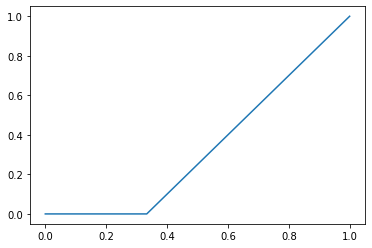


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LinearRegression()  - (Fitting) SCORE FOR:  Negotiation and collaboration for resource allocation and demand efficiency
0.3364371583358683

AUC: 0.814 (0.012)

ROC CURVE


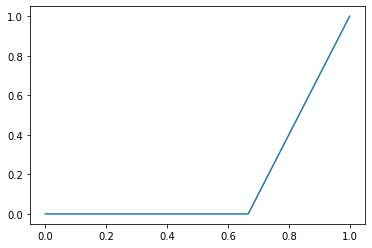


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.25      0.33      0.29        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.17        42
   macro avg       0.12      0.17      0.14        42
weighted avg       0.12      0.17      0.14        42


LinearRegression()  - (Fitting) SCORE FOR:  Different responses according to different demand/response schemes (price-based)
0.8781268282837047

AUC: 0.989 (0.016)

ROC CURVE


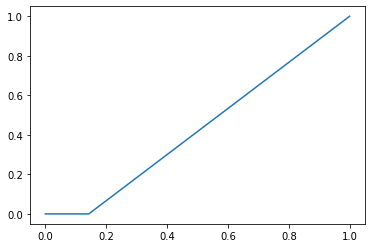


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.46      0.86      0.60        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.43        42
   macro avg       0.23      0.43      0.30        42
weighted avg       0.23      0.43      0.30        42


LinearRegression()  - (Fitting) SCORE FOR:  to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.
0.6437154474891422

AUC: 0.922 (0.031)

ROC CURVE


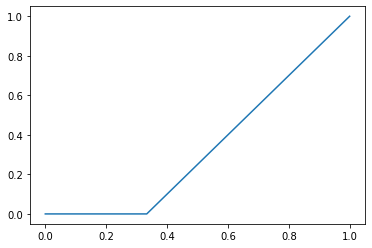


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LinearRegression()  - (Fitting) SCORE FOR:  demand side management
0.7147908990084677

AUC: 0.956 (0.004)

ROC CURVE


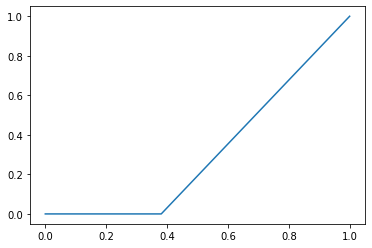


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.38      0.62      0.47        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.31        42
   macro avg       0.19      0.31      0.24        42
weighted avg       0.19      0.31      0.24        42


LinearRegression()  - (Fitting) SCORE FOR:  battery storage models
0.8081071489990735

AUC: 0.940 (0.013)

ROC CURVE


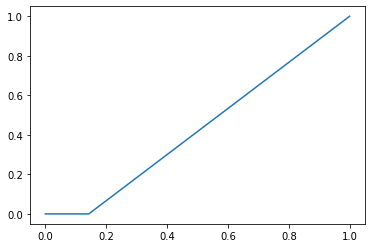


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.46      0.86      0.60        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.43        42
   macro avg       0.23      0.43      0.30        42
weighted avg       0.23      0.43      0.30        42


LinearRegression()  - (Fitting) SCORE FOR:  use storage and demand-response techniques
0.6605573563519052

AUC: 0.950 (0.038)

ROC CURVE


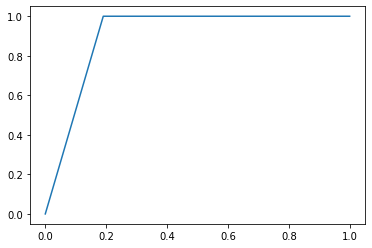


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89        21
         1.0       0.84      1.00      0.91        21

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42


LinearRegression()  - (Fitting) SCORE FOR:  balance energy consumption and production
0.9222595152475738

AUC: 1.000 (0.000)

ROC CURVE


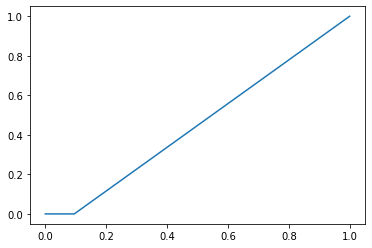


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LinearRegression()  - (Fitting) SCORE FOR:  deploy batteries in different ways depending on the behaviour of their members
0.6524028527990278

AUC: 0.963 (0.026)

ROC CURVE


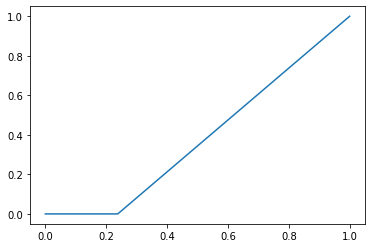


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.38        42
   macro avg       0.22      0.38      0.28        42
weighted avg       0.22      0.38      0.28        42


LinearRegression()  - (Fitting) SCORE FOR:  control the battery and enhance the operation of the system
0.9188138993649234

AUC: 0.989 (0.016)

ROC CURVE


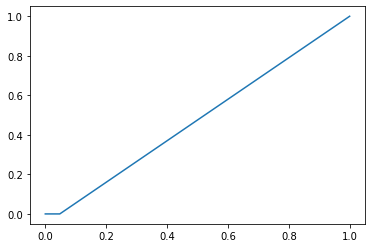


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LinearRegression()  - (Fitting) SCORE FOR:  decrease the power consumption from power utility by using available energy from the solar panels
0.9575240502083316

AUC: 1.000 (0.000)

ROC CURVE


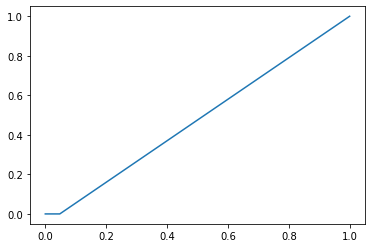


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LinearRegression()  - ERRORS (Samples that have only one of the classes (Maybe class "0")):  18

MODEL =>  LogisticRegression()

LogisticRegression()  - (Fitting) SCORE FOR:  load-generation balance
0.38095238095238093

AUC: 0.840 (0.041)

ROC CURVE


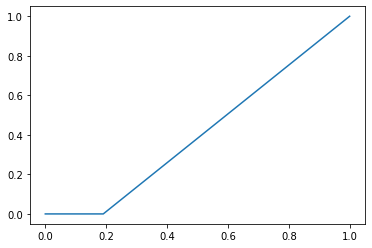


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


LogisticRegression()  - (Fitting) SCORE FOR:  minimize the average vehicle waiting time in the network
0.4117647058823529

AUC: 0.851 (0.028)

ROC CURVE


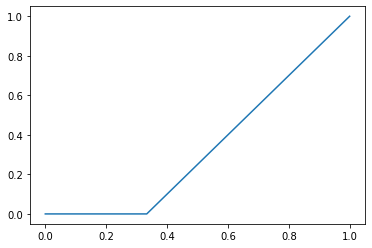


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LogisticRegression()  - (Fitting) SCORE FOR:  north-to-south, red-to-green transition times
0.7441860465116279

AUC: 0.936 (0.034)

ROC CURVE


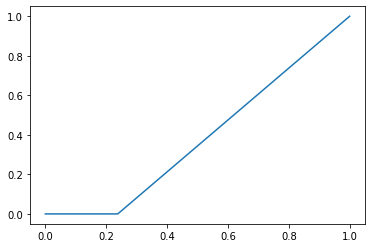


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.38        42
   macro avg       0.22      0.38      0.28        42
weighted avg       0.22      0.38      0.28        42


LogisticRegression()  - (Fitting) SCORE FOR:  avoid many simultaneous charging cycles
0.48235294117647054

AUC: 0.867 (0.029)

ROC CURVE


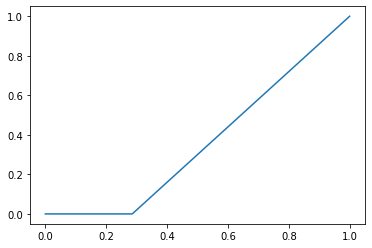


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


LogisticRegression()  - (Fitting) SCORE FOR:  optimise energy usage in a range of weather conditions
0.19047619047619047

AUC: 0.740 (0.077)

ROC CURVE


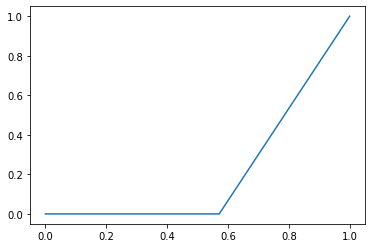


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.30      0.43      0.35        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.21        42
   macro avg       0.15      0.21      0.18        42
weighted avg       0.15      0.21      0.18        42


LogisticRegression()  - (Fitting) SCORE FOR:  promote to use a VPP from a new electricity production cost policy
0.3647058823529412

AUC: 0.865 (0.057)

ROC CURVE


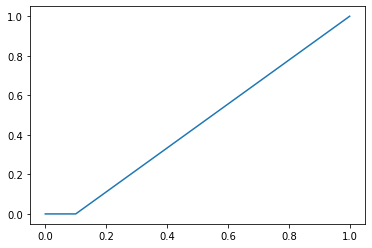


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        20
         1.0       0.00      0.00      0.00        20

    accuracy                           0.45        40
   macro avg       0.24      0.45      0.31        40
weighted avg       0.24      0.45      0.31        40


LogisticRegression()  - (Fitting) SCORE FOR:  cluster together into local energy collectives
0.6941176470588235

AUC: 0.882 (0.045)

ROC CURVE


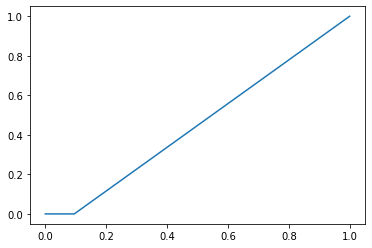


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LogisticRegression()  - (Fitting) SCORE FOR:  market mechanisms
0.9069767441860466

AUC: 0.977 (0.007)

ROC CURVE


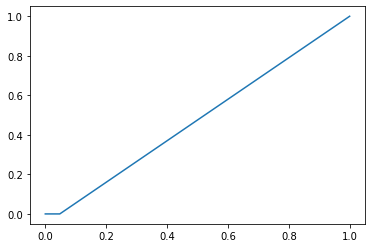


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LogisticRegression()  - (Fitting) SCORE FOR:  peak optimization
0.5529411764705883

AUC: 0.886 (0.023)

ROC CURVE


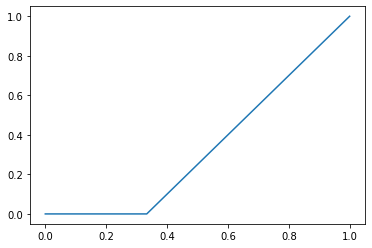


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LogisticRegression()  - (Fitting) SCORE FOR:  agents perform different functions based on their unique advantages relative to other agents postdisruption
0.47619047619047616

AUC: 0.875 (0.013)

ROC CURVE


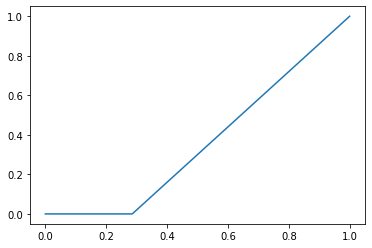


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


LogisticRegression()  - (Fitting) SCORE FOR:  Negotiation and collaboration for resource allocation and demand efficiency
0.19047619047619047

AUC: 0.766 (0.036)

ROC CURVE


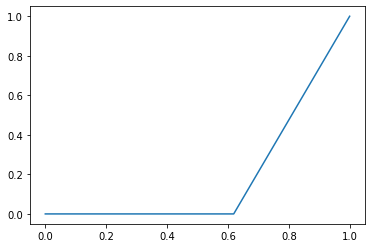


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.28      0.38      0.32        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.19        42
   macro avg       0.14      0.19      0.16        42
weighted avg       0.14      0.19      0.16        42


LogisticRegression()  - (Fitting) SCORE FOR:  Different responses according to different demand/response schemes (price-based)
0.9767441860465116

AUC: 0.994 (0.008)

ROC CURVE


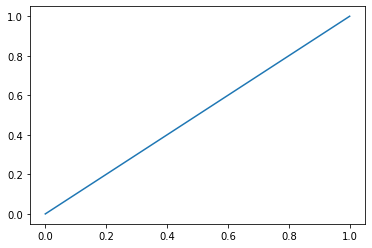


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


LogisticRegression()  - (Fitting) SCORE FOR:  to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.
0.6705882352941177



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AUC: 0.898 (0.019)

ROC CURVE


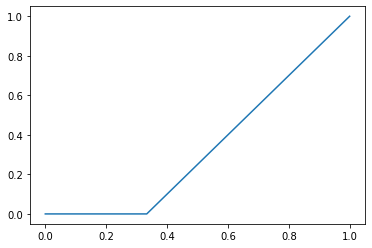


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LogisticRegression()  - (Fitting) SCORE FOR:  demand side management
0.6235294117647059

AUC: 0.899 (0.024)

ROC CURVE


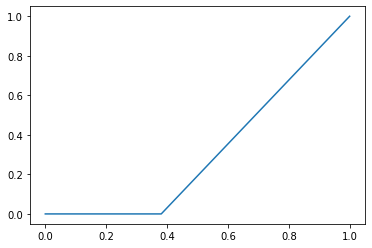


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.38      0.62      0.47        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.31        42
   macro avg       0.19      0.31      0.24        42
weighted avg       0.19      0.31      0.24        42


LogisticRegression()  - (Fitting) SCORE FOR:  battery storage models
0.8352941176470589

AUC: 0.953 (0.004)

ROC CURVE


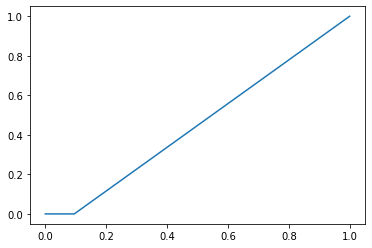


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LogisticRegression()  - (Fitting) SCORE FOR:  use storage and demand-response techniques
0.7411764705882353

AUC: 0.908 (0.037)

ROC CURVE


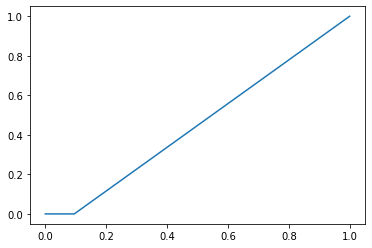


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LogisticRegression()  - (Fitting) SCORE FOR:  balance energy consumption and production
0.9302325581395349

AUC: 0.983 (0.001)

ROC CURVE


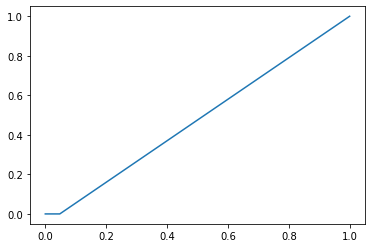


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LogisticRegression()  - (Fitting) SCORE FOR:  deploy batteries in different ways depending on the behaviour of their members
0.7411764705882353

AUC: 0.905 (0.045)

ROC CURVE


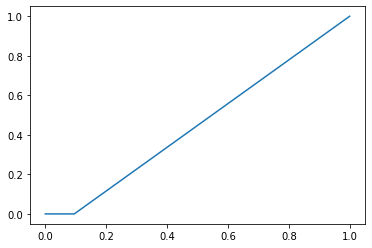


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LogisticRegression()  - (Fitting) SCORE FOR:  control the battery and enhance the operation of the system
0.9534883720930233

AUC: 0.989 (0.016)

ROC CURVE


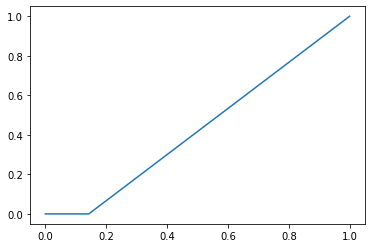


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.46      0.86      0.60        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.43        42
   macro avg       0.23      0.43      0.30        42
weighted avg       0.23      0.43      0.30        42


LogisticRegression()  - (Fitting) SCORE FOR:  decrease the power consumption from power utility by using available energy from the solar panels
0.9767441860465116

AUC: 0.989 (0.016)

ROC CURVE


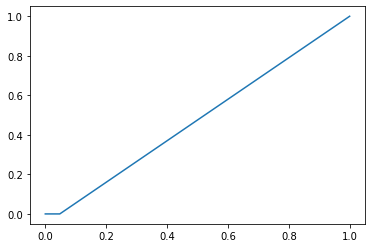


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LogisticRegression()  - ERRORS (Samples that have only one of the classes (Maybe class "0")):  18

MODEL =>  LinearSVR()

LinearSVR()  - (Fitting) SCORE FOR:  load-generation balance
0.224514727767137

AUC: 0.883 (0.047)

ROC CURVE


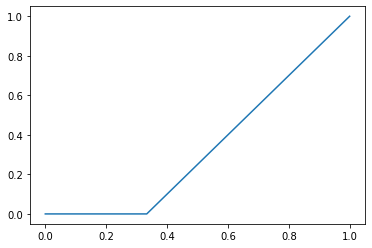


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LinearSVR()  - (Fitting) SCORE FOR:  minimize the average vehicle waiting time in the network
0.2652596047574973

AUC: 0.823 (0.074)

ROC CURVE


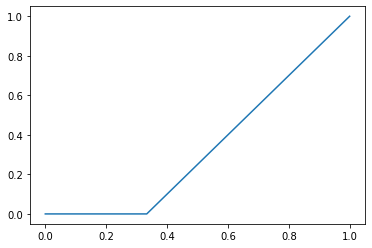


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LinearSVR()  - (Fitting) SCORE FOR:  north-to-south, red-to-green transition times
0.7251690593704285

AUC: 0.954 (0.021)

ROC CURVE


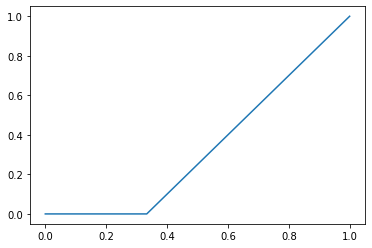


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LinearSVR()  - (Fitting) SCORE FOR:  avoid many simultaneous charging cycles
0.23352237144700372

AUC: 0.899 (0.031)

ROC CURVE


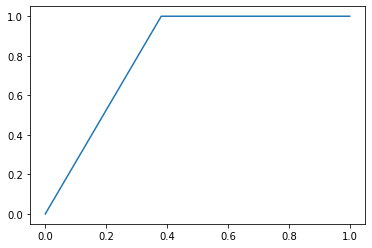


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.76        21
         1.0       0.72      1.00      0.84        21

    accuracy                           0.81        42
   macro avg       0.86      0.81      0.80        42
weighted avg       0.86      0.81      0.80        42


LinearSVR()  - (Fitting) SCORE FOR:  optimise energy usage in a range of weather conditions
-0.03183106860799256

AUC: 0.718 (0.010)

ROC CURVE


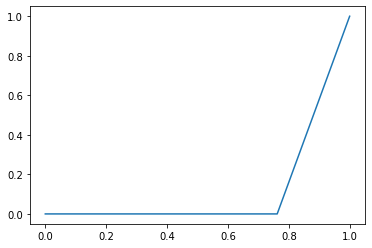


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.19      0.24      0.21        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.12        42
   macro avg       0.10      0.12      0.11        42
weighted avg       0.10      0.12      0.11        42


LinearSVR()  - (Fitting) SCORE FOR:  promote to use a VPP from a new electricity production cost policy
-0.05972510245155904

AUC: 0.830 (0.054)

ROC CURVE


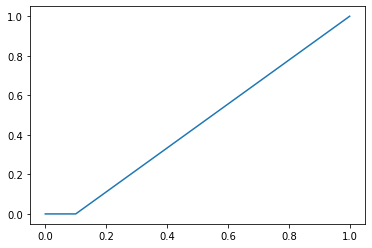


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        20
         1.0       0.00      0.00      0.00        20

    accuracy                           0.45        40
   macro avg       0.24      0.45      0.31        40
weighted avg       0.24      0.45      0.31        40


LinearSVR()  - (Fitting) SCORE FOR:  cluster together into local energy collectives
0.4924005554076837

AUC: 0.923 (0.033)

ROC CURVE


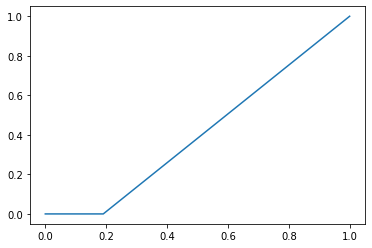


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


LinearSVR()  - (Fitting) SCORE FOR:  market mechanisms
0.9034951428961058

AUC: 0.977 (0.033)

ROC CURVE


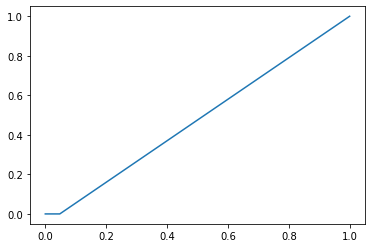


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LinearSVR()  - (Fitting) SCORE FOR:  peak optimization
0.5238647754378647

AUC: 0.846 (0.041)

ROC CURVE


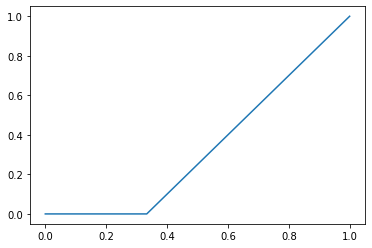


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LinearSVR()  - (Fitting) SCORE FOR:  agents perform different functions based on their unique advantages relative to other agents postdisruption
0.2624265520766359

AUC: 0.858 (0.047)

ROC CURVE


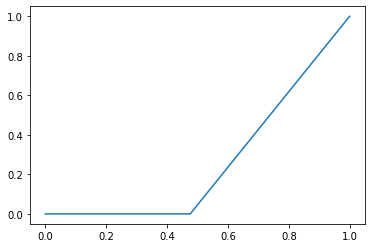


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.34      0.52      0.42        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.26        42
   macro avg       0.17      0.26      0.21        42
weighted avg       0.17      0.26      0.21        42


LinearSVR()  - (Fitting) SCORE FOR:  Negotiation and collaboration for resource allocation and demand efficiency
-0.16036599354690595

AUC: 0.773 (0.040)

ROC CURVE


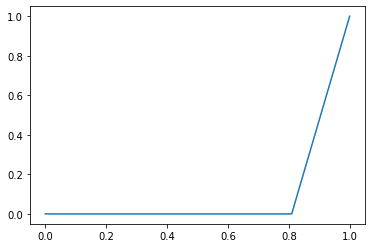


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.16      0.19      0.17        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.10        42
   macro avg       0.08      0.10      0.09        42
weighted avg       0.08      0.10      0.09        42


LinearSVR()  - (Fitting) SCORE FOR:  Different responses according to different demand/response schemes (price-based)
0.7376997713653806

AUC: 1.000 (0.000)

ROC CURVE


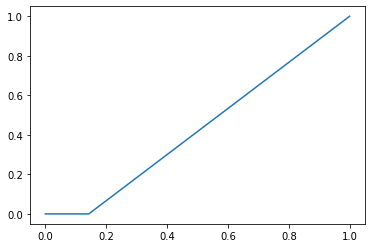


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.46      0.86      0.60        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.43        42
   macro avg       0.23      0.43      0.30        42
weighted avg       0.23      0.43      0.30        42


LinearSVR()  - (Fitting) SCORE FOR:  to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.
0.42518619003083125

AUC: 0.855 (0.020)

ROC CURVE


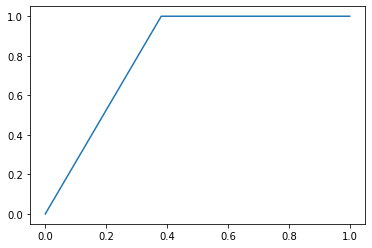


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.76        21
         1.0       0.72      1.00      0.84        21

    accuracy                           0.81        42
   macro avg       0.86      0.81      0.80        42
weighted avg       0.86      0.81      0.80        42


LinearSVR()  - (Fitting) SCORE FOR:  demand side management
0.5868375014338642

AUC: 0.924 (0.028)

ROC CURVE


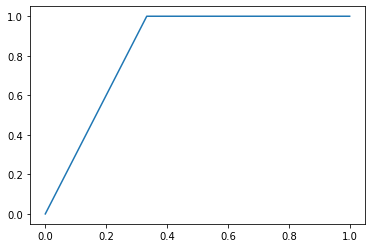


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80        21
         1.0       0.75      1.00      0.86        21

    accuracy                           0.83        42
   macro avg       0.88      0.83      0.83        42
weighted avg       0.88      0.83      0.83        42


LinearSVR()  - (Fitting) SCORE FOR:  battery storage models
0.7766793875579037

AUC: 0.967 (0.030)

ROC CURVE


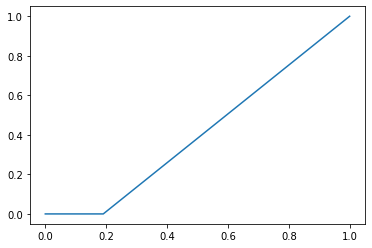


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


LinearSVR()  - (Fitting) SCORE FOR:  use storage and demand-response techniques
0.4924021629118116



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



AUC: 0.928 (0.050)

ROC CURVE


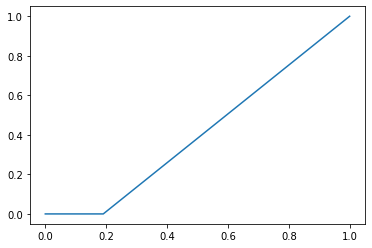


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


LinearSVR()  - (Fitting) SCORE FOR:  balance energy consumption and production
0.8888836976724508

AUC: 1.000 (0.000)

ROC CURVE


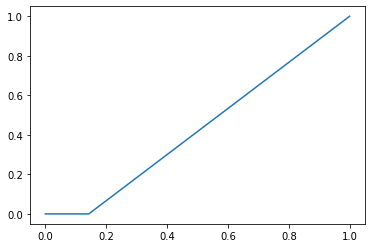


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.46      0.86      0.60        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.43        42
   macro avg       0.23      0.43      0.30        42
weighted avg       0.23      0.43      0.30        42


LinearSVR()  - (Fitting) SCORE FOR:  deploy batteries in different ways depending on the behaviour of their members
0.4924017124610035

AUC: 0.946 (0.024)

ROC CURVE


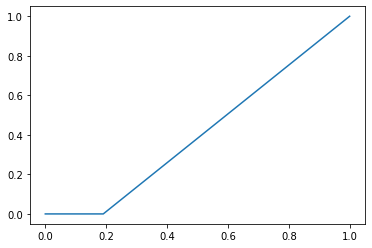


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


LinearSVR()  - (Fitting) SCORE FOR:  control the battery and enhance the operation of the system
0.8163799305972053

AUC: 0.989 (0.016)

ROC CURVE


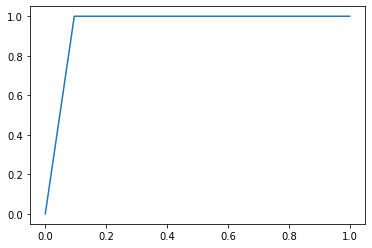


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        21
         1.0       0.91      1.00      0.95        21

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42


LinearSVR()  - (Fitting) SCORE FOR:  decrease the power consumption from power utility by using available energy from the solar panels
0.8878678034790322

AUC: 1.000 (0.000)

ROC CURVE


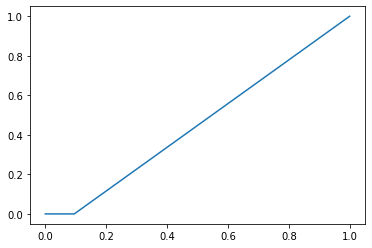


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LinearSVR()  - ERRORS (Samples that have only one of the classes (Maybe class "0")):  18

MODEL =>  LinearSVC()

LinearSVC()  - (Fitting) SCORE FOR:  load-generation balance
0.6428571428571428

AUC: 0.845 (0.029)

ROC CURVE


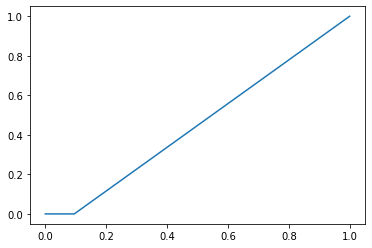


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LinearSVC()  - (Fitting) SCORE FOR:  minimize the average vehicle waiting time in the network
0.45882352941176474

AUC: 0.848 (0.015)

ROC CURVE


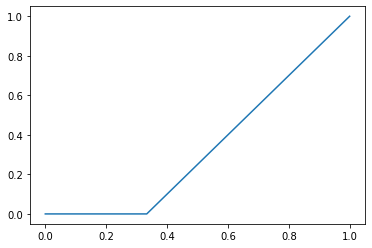


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LinearSVC()  - (Fitting) SCORE FOR:  north-to-south, red-to-green transition times
0.7674418604651163

AUC: 0.930 (0.017)

ROC CURVE


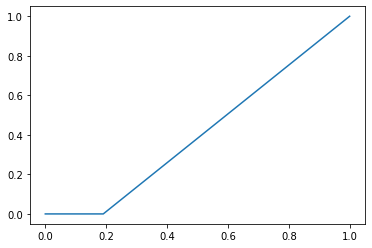


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


LinearSVC()  - (Fitting) SCORE FOR:  avoid many simultaneous charging cycles
0.48235294117647054

AUC: 0.867 (0.053)

ROC CURVE


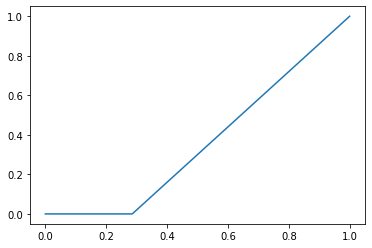


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


LinearSVC()  - (Fitting) SCORE FOR:  optimise energy usage in a range of weather conditions
0.2142857142857143

AUC: 0.798 (0.034)

ROC CURVE


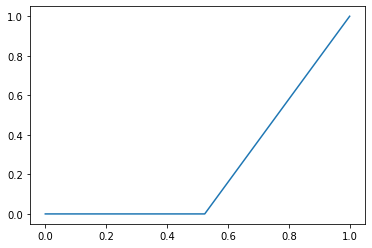


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.32      0.48      0.38        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.24        42
   macro avg       0.16      0.24      0.19        42
weighted avg       0.16      0.24      0.19        42


LinearSVC()  - (Fitting) SCORE FOR:  promote to use a VPP from a new electricity production cost policy
0.6

AUC: 0.852 (0.020)

ROC CURVE


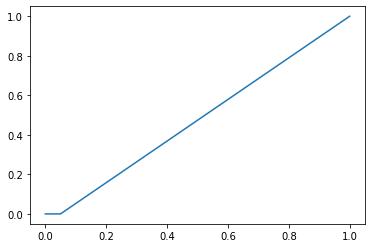


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.64        20
         1.0       0.00      0.00      0.00        20

    accuracy                           0.48        40
   macro avg       0.24      0.47      0.32        40
weighted avg       0.24      0.47      0.32        40


LinearSVC()  - (Fitting) SCORE FOR:  cluster together into local energy collectives
0.7176470588235294

AUC: 0.915 (0.031)

ROC CURVE


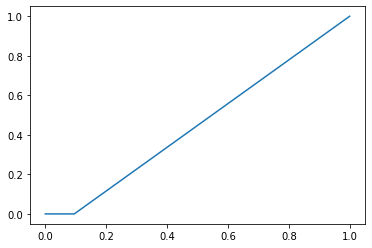


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LinearSVC()  - (Fitting) SCORE FOR:  market mechanisms
0.9534883720930233

AUC: 0.988 (0.008)

ROC CURVE


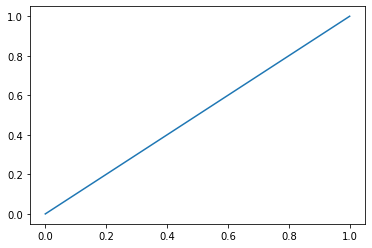


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


LinearSVC()  - (Fitting) SCORE FOR:  peak optimization
0.6

AUC: 0.880 (0.021)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



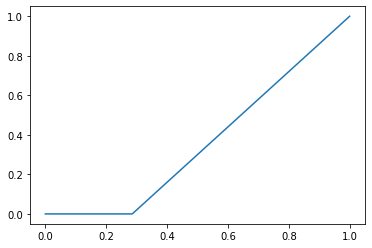


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


LinearSVC()  - (Fitting) SCORE FOR:  agents perform different functions based on their unique advantages relative to other agents postdisruption
0.5476190476190477

AUC: 0.869 (0.018)

ROC CURVE


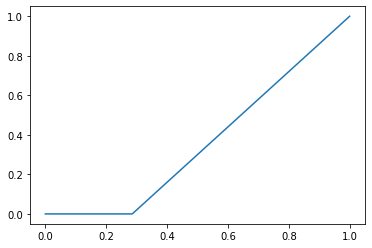


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


LinearSVC()  - (Fitting) SCORE FOR:  Negotiation and collaboration for resource allocation and demand efficiency
0.1428571428571429

AUC: 0.734 (0.053)

ROC CURVE


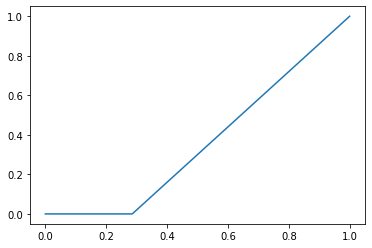


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


LinearSVC()  - (Fitting) SCORE FOR:  Different responses according to different demand/response schemes (price-based)
0.9767441860465116

AUC: 0.994 (0.009)

ROC CURVE


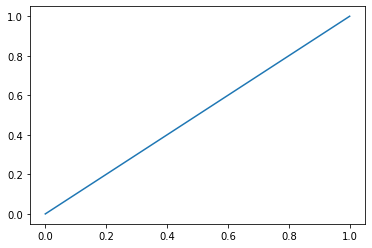


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


LinearSVC()  - (Fitting) SCORE FOR:  to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.
0.6705882352941177

AUC: 0.901 (0.016)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



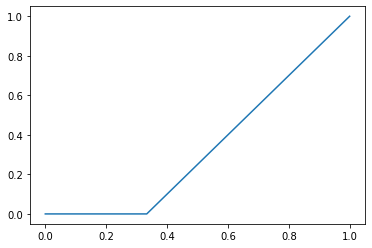


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


LinearSVC()  - (Fitting) SCORE FOR:  demand side management
0.7176470588235294

AUC: 0.885 (0.040)

ROC CURVE


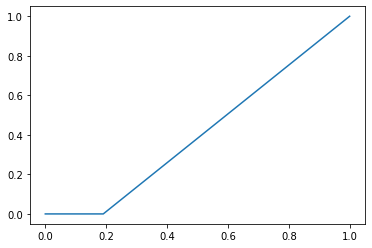


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


LinearSVC()  - (Fitting) SCORE FOR:  battery storage models
0.8352941176470589

AUC: 0.956 (0.028)

ROC CURVE


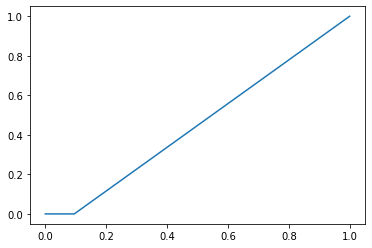


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LinearSVC()  - (Fitting) SCORE FOR:  use storage and demand-response techniques
0.7176470588235294

AUC: 0.927 (0.028)

ROC CURVE


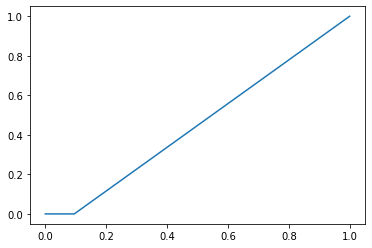


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LinearSVC()  - (Fitting) SCORE FOR:  balance energy consumption and production
1.0

AUC: 0.994 (0.009)

ROC CURVE


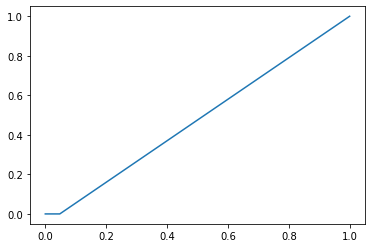


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LinearSVC()  - (Fitting) SCORE FOR:  deploy batteries in different ways depending on the behaviour of their members
0.7176470588235294

AUC: 0.916 (0.045)

ROC CURVE


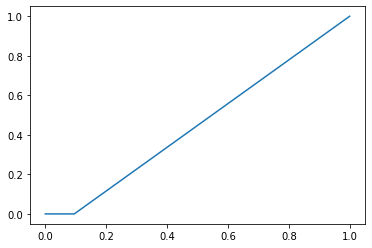


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


LinearSVC()  - (Fitting) SCORE FOR:  control the battery and enhance the operation of the system
0.9767441860465116

AUC: 0.988 (0.008)

ROC CURVE


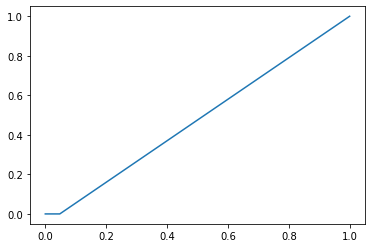


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LinearSVC()  - (Fitting) SCORE FOR:  decrease the power consumption from power utility by using available energy from the solar panels
1.0

AUC: 0.994 (0.008)

ROC CURVE


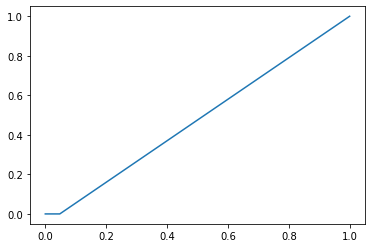


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


LinearSVC()  - ERRORS (Samples that have only one of the classes (Maybe class "0")):  18

MODEL =>  DecisionTreeRegressor()

DecisionTreeRegressor()  - (Fitting) SCORE FOR:  load-generation balance
0.7928980851599898

AUC: 0.923 (0.010)

ROC CURVE


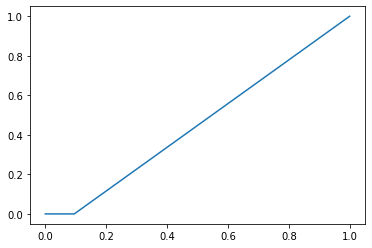


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  minimize the average vehicle waiting time in the network
0.626890756302521

AUC: 0.899 (0.043)

ROC CURVE


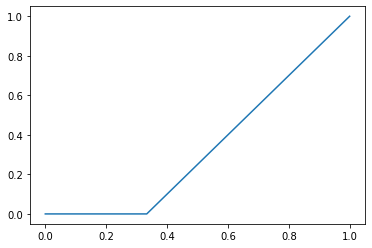


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  north-to-south, red-to-green transition times
0.8297872340425532

AUC: 0.948 (0.013)

ROC CURVE


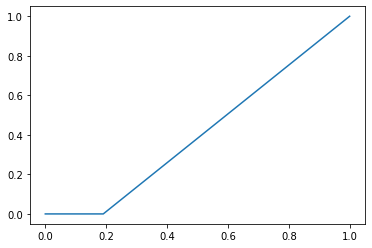


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  avoid many simultaneous charging cycles
0.6307809330628803

AUC: 0.904 (0.026)

ROC CURVE


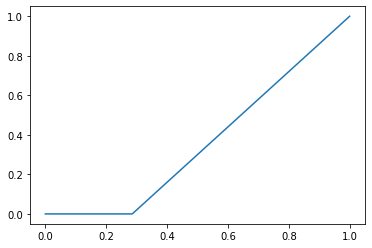


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  optimise energy usage in a range of weather conditions
0.487272082746142

AUC: 0.773 (0.039)

ROC CURVE


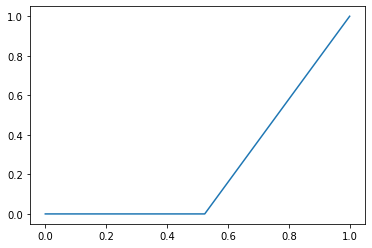


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.32      0.48      0.38        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.24        42
   macro avg       0.16      0.24      0.19        42
weighted avg       0.16      0.24      0.19        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  promote to use a VPP from a new electricity production cost policy
1.0

AUC: 1.000 (0.000)

ROC CURVE


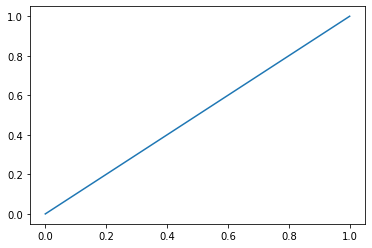


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        20
         1.0       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  cluster together into local energy collectives
0.8321815312619034

AUC: 0.965 (0.020)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



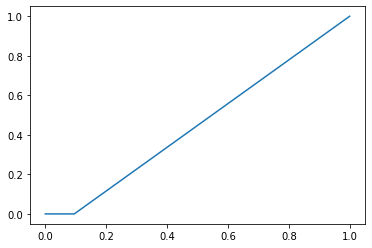


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  market mechanisms
0.9545454545454546

AUC: 0.989 (0.008)

ROC CURVE


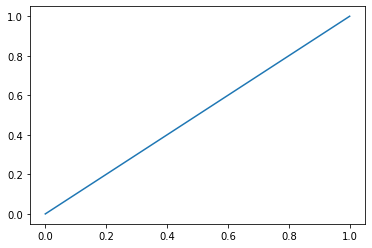


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  peak optimization
0.6851973684210526

AUC: 0.940 (0.050)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



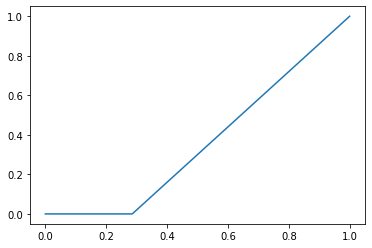


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  agents perform different functions based on their unique advantages relative to other agents postdisruption
0.6906030477459049

AUC: 0.931 (0.034)

ROC CURVE


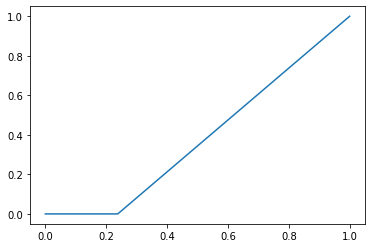


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.38        42
   macro avg       0.22      0.38      0.28        42
weighted avg       0.22      0.38      0.28        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  Negotiation and collaboration for resource allocation and demand efficiency
0.5718020541549953

AUC: 0.823 (0.033)

ROC CURVE


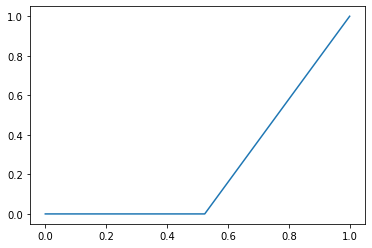


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.32      0.48      0.38        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.24        42
   macro avg       0.16      0.24      0.19        42
weighted avg       0.16      0.24      0.19        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  Different responses according to different demand/response schemes (price-based)
1.0

AUC: 0.994 (0.009)

ROC CURVE


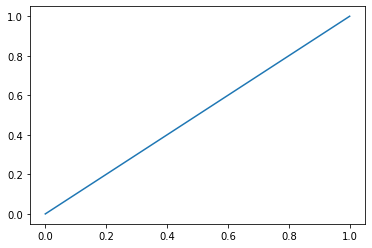


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.
0.9770177838577292

AUC: 0.975 (0.006)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



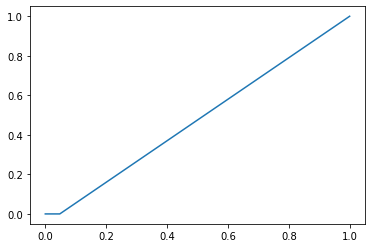


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  demand side management
0.7974842110757346

AUC: 0.931 (0.011)

ROC CURVE


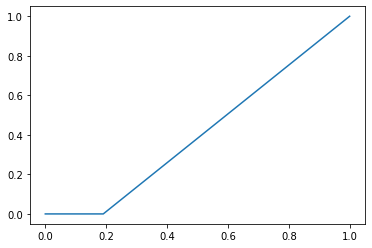


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  battery storage models
0.9319881559266155

AUC: 0.954 (0.042)

ROC CURVE


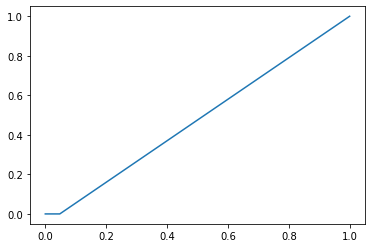


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  use storage and demand-response techniques
0.9319358512635824

AUC: 0.960 (0.042)

ROC CURVE


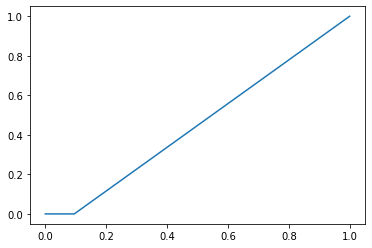


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  balance energy consumption and production
1.0

AUC: 1.000 (0.000)

ROC CURVE


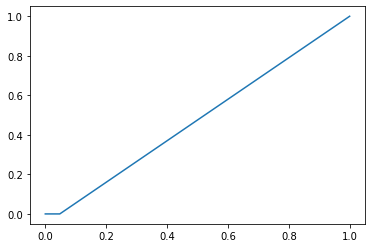


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  deploy batteries in different ways depending on the behaviour of their members
0.9318598382749326

AUC: 0.975 (0.021)

ROC CURVE


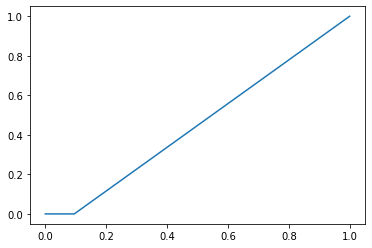


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  control the battery and enhance the operation of the system
1.0

AUC: 0.989 (0.008)

ROC CURVE


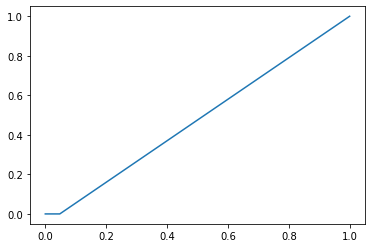


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


DecisionTreeRegressor()  - (Fitting) SCORE FOR:  decrease the power consumption from power utility by using available energy from the solar panels
1.0

AUC: 1.000 (0.000)

ROC CURVE


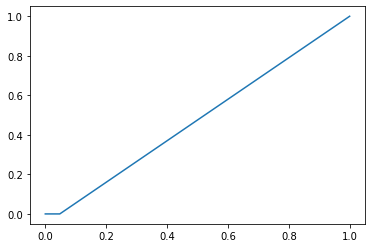


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


DecisionTreeRegressor()  - ERRORS (Samples that have only one of the classes (Maybe class "0")):  18

MODEL =>  RandomForestRegressor()

RandomForestRegressor()  - (Fitting) SCORE FOR:  load-generation balance
0.7887453103578121

AUC: 0.957 (0.027)

ROC CURVE


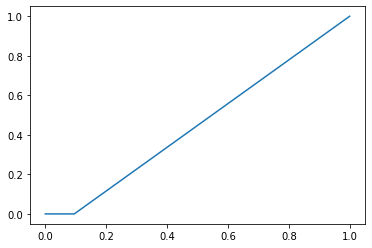


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  minimize the average vehicle waiting time in the network
0.6075818213611472

AUC: 0.894 (0.047)

ROC CURVE


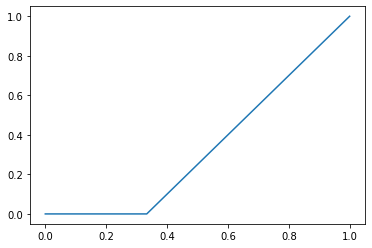


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.33        42
   macro avg       0.20      0.33      0.25        42
weighted avg       0.20      0.33      0.25        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  north-to-south, red-to-green transition times
0.8263375116099919

AUC: 0.946 (0.031)

ROC CURVE


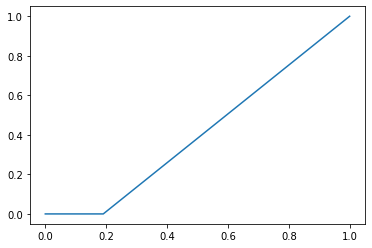


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  avoid many simultaneous charging cycles
0.6155824922269171

AUC: 0.897 (0.022)

ROC CURVE


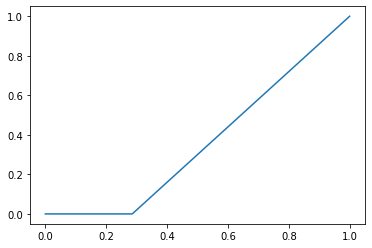


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  optimise energy usage in a range of weather conditions
0.4942978461205404

AUC: 0.820 (0.015)

ROC CURVE


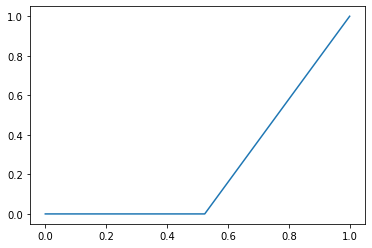


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.32      0.48      0.38        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.24        42
   macro avg       0.16      0.24      0.19        42
weighted avg       0.16      0.24      0.19        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  promote to use a VPP from a new electricity production cost policy
0.9990729411764706

AUC: 0.989 (0.016)

ROC CURVE


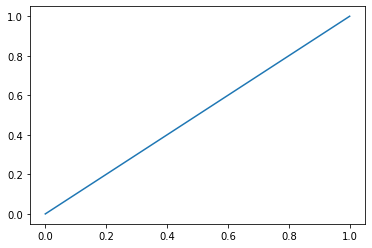


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        20
         1.0       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40


RandomForestRegressor()  - (Fitting) SCORE FOR:  cluster together into local energy collectives


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.8283106155377336

AUC: 0.942 (0.034)

ROC CURVE


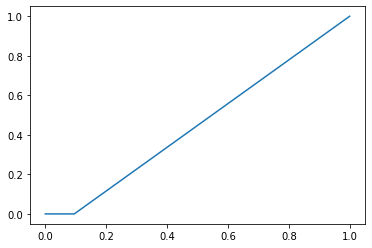


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  market mechanisms
0.9533050690120175

AUC: 0.988 (0.017)

ROC CURVE


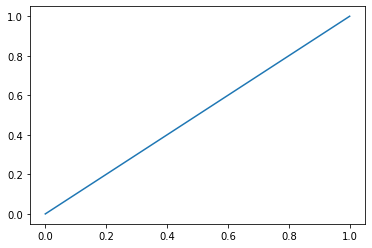


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  peak optimization


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.6991283445553638

AUC: 0.941 (0.032)

ROC CURVE


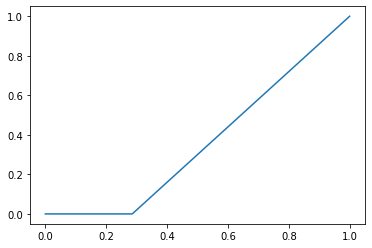


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  agents perform different functions based on their unique advantages relative to other agents postdisruption
0.6843113154241471

AUC: 0.912 (0.018)

ROC CURVE


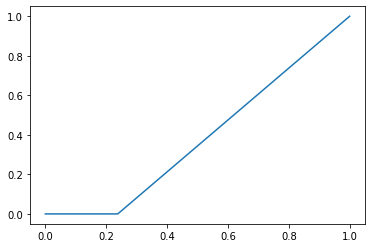


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.38        42
   macro avg       0.22      0.38      0.28        42
weighted avg       0.22      0.38      0.28        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  Negotiation and collaboration for resource allocation and demand efficiency
0.567035095913883

AUC: 0.873 (0.036)

ROC CURVE


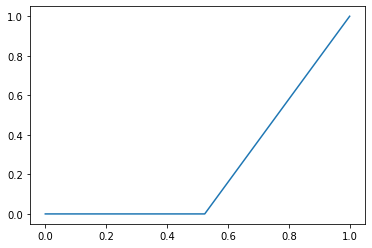


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.32      0.48      0.38        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.24        42
   macro avg       0.16      0.24      0.19        42
weighted avg       0.16      0.24      0.19        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  Different responses according to different demand/response schemes (price-based)
0.9992046511627907

AUC: 1.000 (0.000)

ROC CURVE


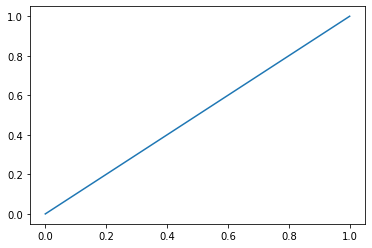


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.9739993258543473

AUC: 0.995 (0.007)

ROC CURVE


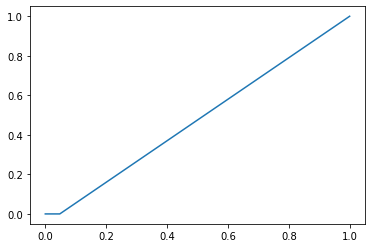


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  demand side management
0.7907630185632297

AUC: 0.950 (0.022)

ROC CURVE


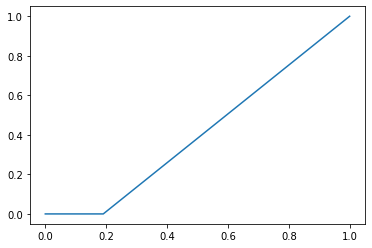


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  battery storage models
0.9273971466650982

AUC: 0.979 (0.015)

ROC CURVE


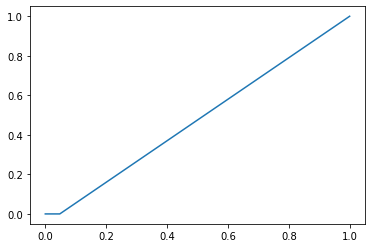


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  use storage and demand-response techniques
0.9292558526733655

AUC: 0.972 (0.005)

ROC CURVE


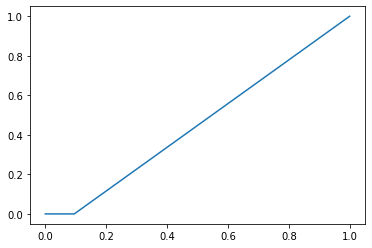


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  balance energy consumption and production
0.9998720930232559

AUC: 1.000 (0.000)

ROC CURVE


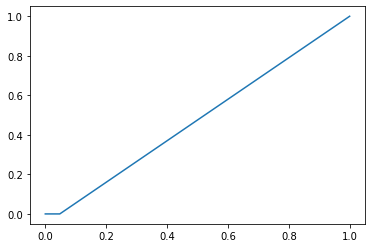


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  deploy batteries in different ways depending on the behaviour of their members
0.9282790996684017

AUC: 0.987 (0.013)

ROC CURVE


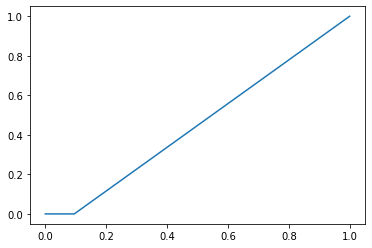


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  control the battery and enhance the operation of the system
0.9956139534883721

AUC: 1.000 (0.000)

ROC CURVE


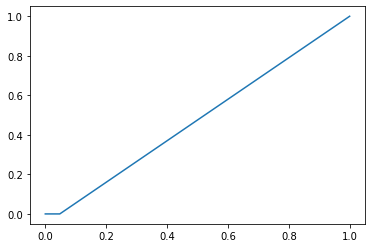


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


RandomForestRegressor()  - (Fitting) SCORE FOR:  decrease the power consumption from power utility by using available energy from the solar panels
0.9987325581395349

AUC: 1.000 (0.000)

ROC CURVE


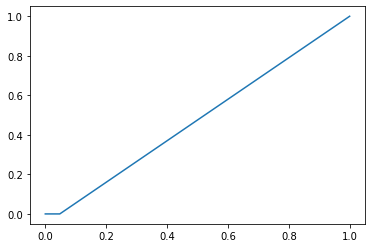


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


RandomForestRegressor()  - ERRORS (Samples that have only one of the classes (Maybe class "0")):  18

MODEL =>  KNeighborsRegressor()

KNeighborsRegressor()  - (Fitting) SCORE FOR:  load-generation balance
0.059047619047619015

AUC: 0.868 (0.011)

ROC CURVE


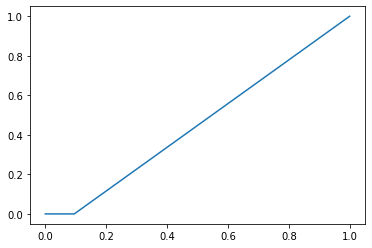


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  minimize the average vehicle waiting time in the network
-1.016941176470588

AUC: 0.867 (0.049)

ROC CURVE


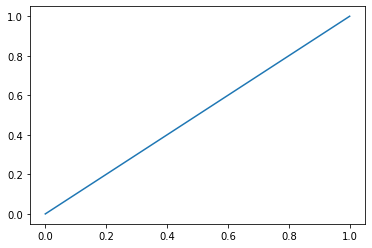


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  north-to-south, red-to-green transition times
-0.2920930232558143

AUC: 0.783 (0.200)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



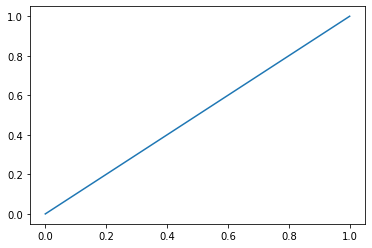


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  avoid many simultaneous charging cycles
-1.0150588235294116

AUC: 0.780 (0.067)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



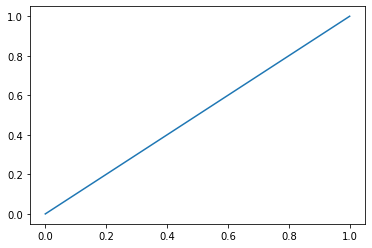


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  optimise energy usage in a range of weather conditions
-0.7285714285714284

AUC: 0.684 (0.096)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



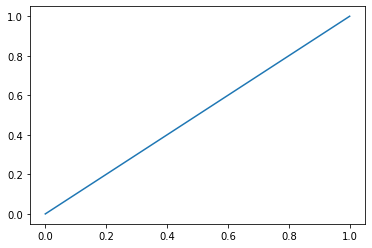


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  promote to use a VPP from a new electricity production cost policy
0.9736470588235294

AUC: 0.989 (0.016)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



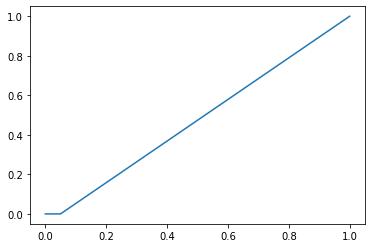


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.64        20
         1.0       0.00      0.00      0.00        20

    accuracy                           0.48        40
   macro avg       0.24      0.47      0.32        40
weighted avg       0.24      0.47      0.32        40


KNeighborsRegressor()  - (Fitting) SCORE FOR:  cluster together into local energy collectives
-0.38164705882352945

AUC: 0.910 (0.017)

ROC CURVE


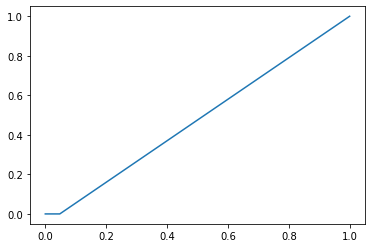


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  market mechanisms
0.6613953488372092

AUC: 0.988 (0.008)

ROC CURVE


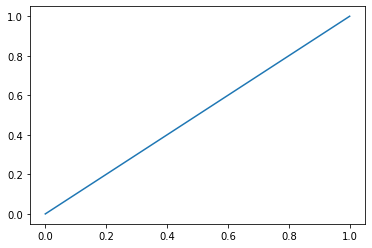


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  peak optimization
-0.22823529411764687

AUC: 0.857 (0.083)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



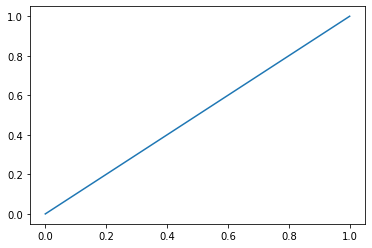


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  agents perform different functions based on their unique advantages relative to other agents postdisruption
-0.1552380952380954

AUC: 0.795 (0.085)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



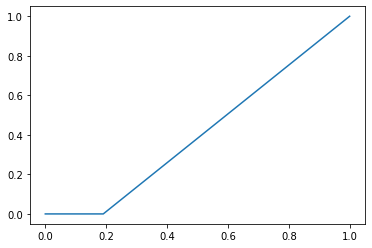


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  Negotiation and collaboration for resource allocation and demand efficiency
-0.26761904761904787

AUC: 0.728 (0.092)

ROC CURVE


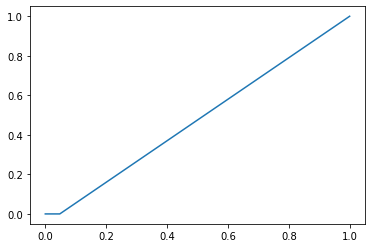


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  Different responses according to different demand/response schemes (price-based)
0.9851162790697674

AUC: 0.994 (0.008)

ROC CURVE


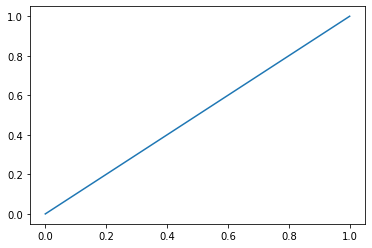


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.
0.9275294117647058

AUC: 0.979 (0.004)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



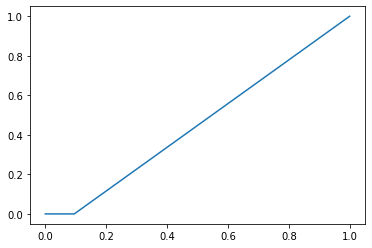


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.45        42
   macro avg       0.24      0.45      0.31        42
weighted avg       0.24      0.45      0.31        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  demand side management
-0.19058823529411772

AUC: 0.943 (0.017)

ROC CURVE


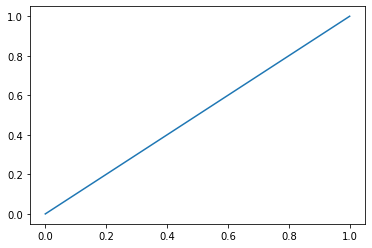


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  battery storage models
0.7374117647058822

AUC: 0.970 (0.016)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



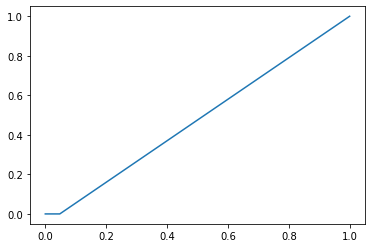


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  use storage and demand-response techniques
0.7712941176470588

AUC: 0.985 (0.016)

ROC CURVE


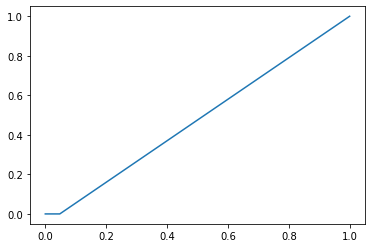


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  balance energy consumption and production
0.9888372093023255

AUC: 1.000 (0.000)

ROC CURVE


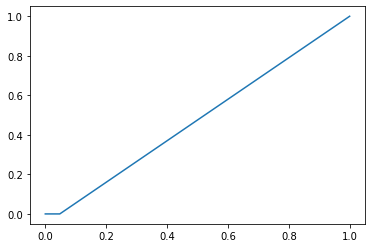


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  deploy batteries in different ways depending on the behaviour of their members
0.7496470588235293

AUC: 0.966 (0.022)

ROC CURVE


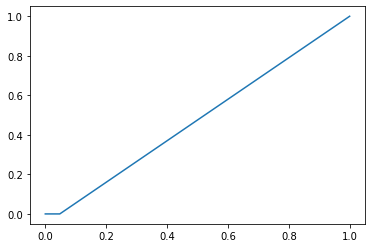


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  control the battery and enhance the operation of the system
0.9851162790697674

AUC: 0.994 (0.008)

ROC CURVE


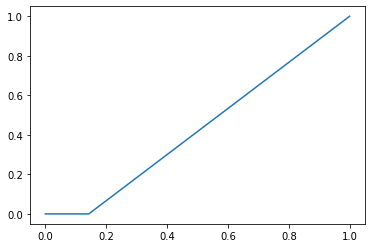


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.46      0.86      0.60        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.43        42
   macro avg       0.23      0.43      0.30        42
weighted avg       0.23      0.43      0.30        42


KNeighborsRegressor()  - (Fitting) SCORE FOR:  decrease the power consumption from power utility by using available energy from the solar panels
0.9916279069767442

AUC: 0.994 (0.008)

ROC CURVE


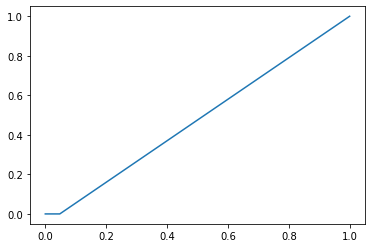


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


KNeighborsRegressor()  - ERRORS (Samples that have only one of the classes (Maybe class "0")):  18

MODEL =>  GaussianNB()

GaussianNB()  - (Fitting) SCORE FOR:  load-generation balance
0.5238095238095238

AUC: 0.881 (0.018)

ROC CURVE


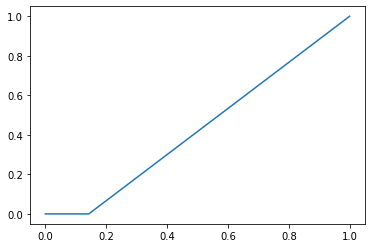


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.46      0.86      0.60        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.43        42
   macro avg       0.23      0.43      0.30        42
weighted avg       0.23      0.43      0.30        42


GaussianNB()  - (Fitting) SCORE FOR:  minimize the average vehicle waiting time in the network
-0.19999999999999996

AUC: 0.705 (0.047)

ROC CURVE


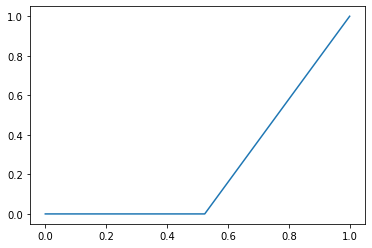


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.32      0.48      0.38        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.24        42
   macro avg       0.16      0.24      0.19        42
weighted avg       0.16      0.24      0.19        42


GaussianNB()  - (Fitting) SCORE FOR:  north-to-south, red-to-green transition times
0.813953488372093

AUC: 0.954 (0.021)

ROC CURVE


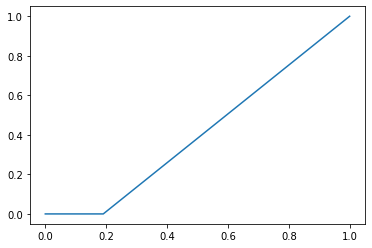


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


GaussianNB()  - (Fitting) SCORE FOR:  avoid many simultaneous charging cycles
0.22352941176470587

AUC: 0.801 (0.051)

ROC CURVE


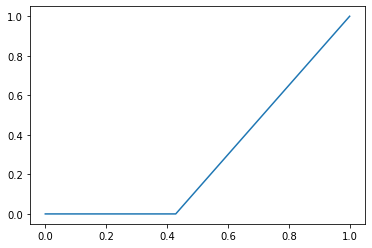


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.36      0.57      0.44        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.29        42
   macro avg       0.18      0.29      0.22        42
weighted avg       0.18      0.29      0.22        42


GaussianNB()  - (Fitting) SCORE FOR:  optimise energy usage in a range of weather conditions
-0.5952380952380953

AUC: 0.602 (0.031)

ROC CURVE


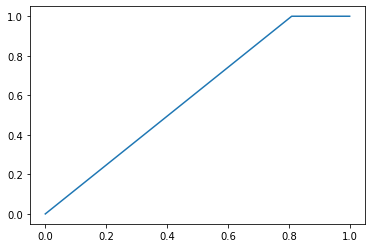


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       1.00      0.19      0.32        21
         1.0       0.55      1.00      0.71        21

    accuracy                           0.60        42
   macro avg       0.78      0.60      0.52        42
weighted avg       0.78      0.60      0.52        42


GaussianNB()  - (Fitting) SCORE FOR:  promote to use a VPP from a new electricity production cost policy
0.9529411764705882

AUC: 0.988 (0.009)

ROC CURVE


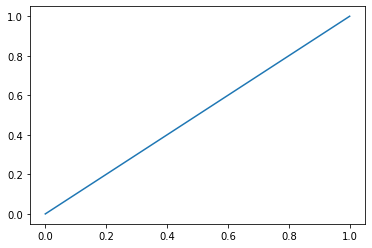


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        20
         1.0       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40


GaussianNB()  - (Fitting) SCORE FOR:  cluster together into local energy collectives
0.3647058823529412

AUC: 0.840 (0.027)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



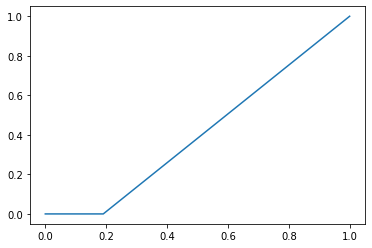


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


GaussianNB()  - (Fitting) SCORE FOR:  market mechanisms
0.9534883720930233

AUC: 0.988 (0.008)

ROC CURVE


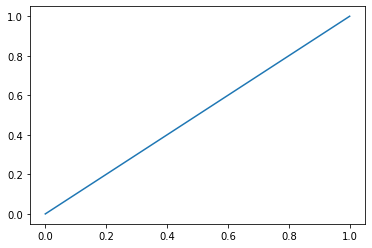


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


GaussianNB()  - (Fitting) SCORE FOR:  peak optimization
0.22352941176470587

AUC: 0.805 (0.009)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



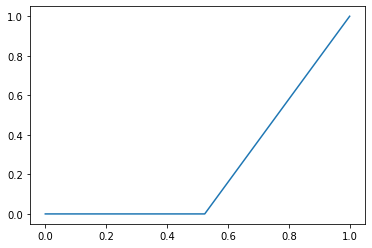


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.32      0.48      0.38        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.24        42
   macro avg       0.16      0.24      0.19        42
weighted avg       0.16      0.24      0.19        42


GaussianNB()  - (Fitting) SCORE FOR:  agents perform different functions based on their unique advantages relative to other agents postdisruption
-0.023809523809523725

AUC: 0.744 (0.008)

ROC CURVE


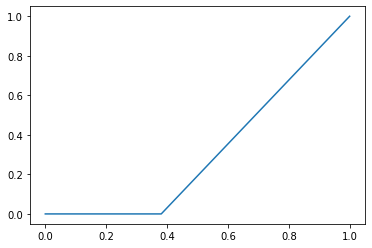


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.38      0.62      0.47        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.31        42
   macro avg       0.19      0.31      0.24        42
weighted avg       0.19      0.31      0.24        42


GaussianNB()  - (Fitting) SCORE FOR:  Negotiation and collaboration for resource allocation and demand efficiency
0.0714285714285714

AUC: 0.766 (0.056)

ROC CURVE


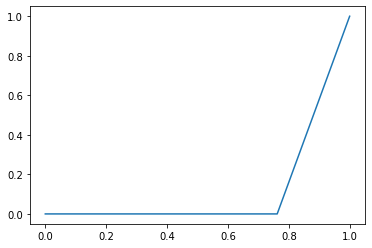


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.19      0.24      0.21        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.12        42
   macro avg       0.10      0.12      0.11        42
weighted avg       0.10      0.12      0.11        42


GaussianNB()  - (Fitting) SCORE FOR:  Different responses according to different demand/response schemes (price-based)
1.0

AUC: 1.000 (0.000)

ROC CURVE


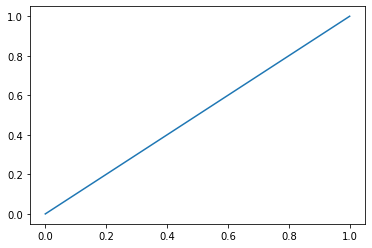


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42


GaussianNB()  - (Fitting) SCORE FOR:  to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.
0.45882352941176474

AUC: 0.866 (0.016)

ROC CURVE


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



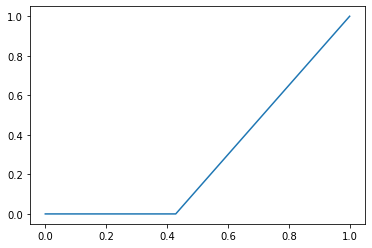


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.36      0.57      0.44        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.29        42
   macro avg       0.18      0.29      0.22        42
weighted avg       0.18      0.29      0.22        42


GaussianNB()  - (Fitting) SCORE FOR:  demand side management
0.6

AUC: 0.900 (0.005)

ROC CURVE


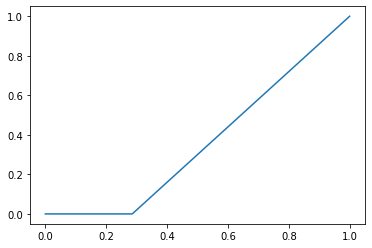


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.42      0.71      0.53        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.36        42
   macro avg       0.21      0.36      0.26        42
weighted avg       0.21      0.36      0.26        42


GaussianNB()  - (Fitting) SCORE FOR:  battery storage models
0.6470588235294117

AUC: 0.908 (0.040)

ROC CURVE


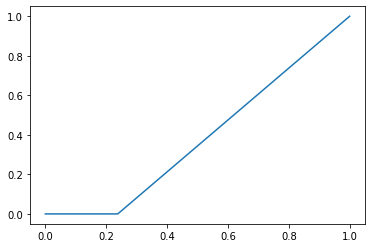


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.38        42
   macro avg       0.22      0.38      0.28        42
weighted avg       0.22      0.38      0.28        42


GaussianNB()  - (Fitting) SCORE FOR:  use storage and demand-response techniques
0.24705882352941178

AUC: 0.807 (0.045)

ROC CURVE


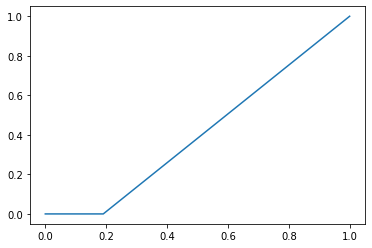


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


GaussianNB()  - (Fitting) SCORE FOR:  balance energy consumption and production
1.0

AUC: 1.000 (0.000)

ROC CURVE


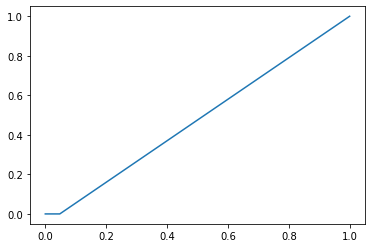


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


GaussianNB()  - (Fitting) SCORE FOR:  deploy batteries in different ways depending on the behaviour of their members
0.24705882352941178

AUC: 0.812 (0.001)

ROC CURVE


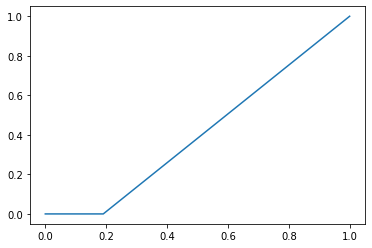


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.45      0.81      0.58        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.40        42
   macro avg       0.22      0.40      0.29        42
weighted avg       0.22      0.40      0.29        42


GaussianNB()  - (Fitting) SCORE FOR:  control the battery and enhance the operation of the system
1.0

AUC: 1.000 (0.000)

ROC CURVE


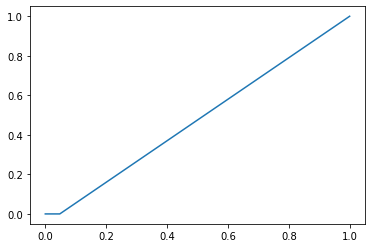


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


GaussianNB()  - (Fitting) SCORE FOR:  decrease the power consumption from power utility by using available energy from the solar panels
1.0

AUC: 1.000 (0.000)

ROC CURVE


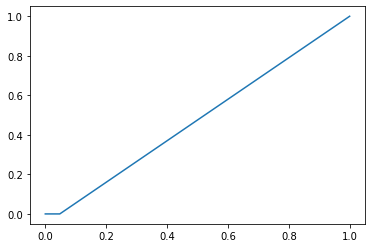


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.49      0.95      0.65        21
         1.0       0.00      0.00      0.00        21

    accuracy                           0.48        42
   macro avg       0.24      0.48      0.32        42
weighted avg       0.24      0.48      0.32        42


GaussianNB()  - ERRORS (Samples that have only one of the classes (Maybe class "0")):  18



In [28]:
models = [LinearRegression(), LogisticRegression(), LinearSVR(), LinearSVC(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor(), GaussianNB()]
# models = [LinearSVR()]

for model in models:
  errors = 0
  print('MODEL => ', model)
  print()
  for col_name in ytrain.columns: 
    try:
      X_train = xtrain
      y_train = pd.DataFrame(ytrain[col_name])

      newX_train, newy_train = rebalancer(X_train, y_train)

      X_test = xtest
      y_test = pd.DataFrame(ytest[col_name])

      newX_test, newy_test = rebalancer(X_test, y_test)

      wrapper = RegressorChain(model)

      wrapper.fit(newX_train, newy_train)
      print(model, ' - (Fitting) SCORE FOR: ', col_name)
      print(wrapper.score(newX_train, newy_train))
      print()

      kfold = model_selection.KFold(n_splits=3, random_state=42, shuffle=True)
      scoring = 'roc_auc'
      results = model_selection.cross_val_score(wrapper, newX_train, newy_train, cv=kfold, scoring=scoring)
      print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
      print()

      yhat = wrapper.predict(newX_test)
      yDF = pd.DataFrame(yhat)

      for i in range(len(yDF)):
        for column in yDF.columns:
          yDF[column][i] = abs(round(yDF[column][i], 0))
          if (yDF[column][i] > 1):
            yDF[column][i] = 1

      yDF.set_index(newy_test.index, inplace=True)
      yDF.columns = newy_test.columns

      print('ROC CURVE')
      fpr, tpr, threshold = metrics.roc_curve(newy_test, yhat)
      plt.plot(fpr,tpr)
      plt.show() 
      print()
      
      print('CLASSIFICATION REPORT:')
      print()
      print(classification_report(newy_test[col_name], yDF[col_name]))
      print()

    except Exception as e:
      errors += 1
      # print(e)
      continue

  print(model, ' - ERRORS (Samples that have only one of the classes (Maybe class "0")): ', errors)
  print()